**The Sparks Foundation**


Author-Aditya Ingle

Task 6 ExploratoryA Data Analysis - Sports

Start off with importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df_matches = pd.read_csv(r'C:\Users\Asus\OneDrive\Desktop\samplepro\Indian Premier League\matches.csv')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df_delivery = pd.read_csv(r'C:\Users\Asus\OneDrive\Desktop\samplepro\Indian Premier League\deliveries.csv', error_bad_lines=False)
df_delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Loading Both Data

& Exploratory Data Analysis

In [4]:
df_delivery.shape

(179078, 21)

In [5]:
df_matches.shape

(756, 18)

In [6]:
df_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

## To Check Matches won by each team

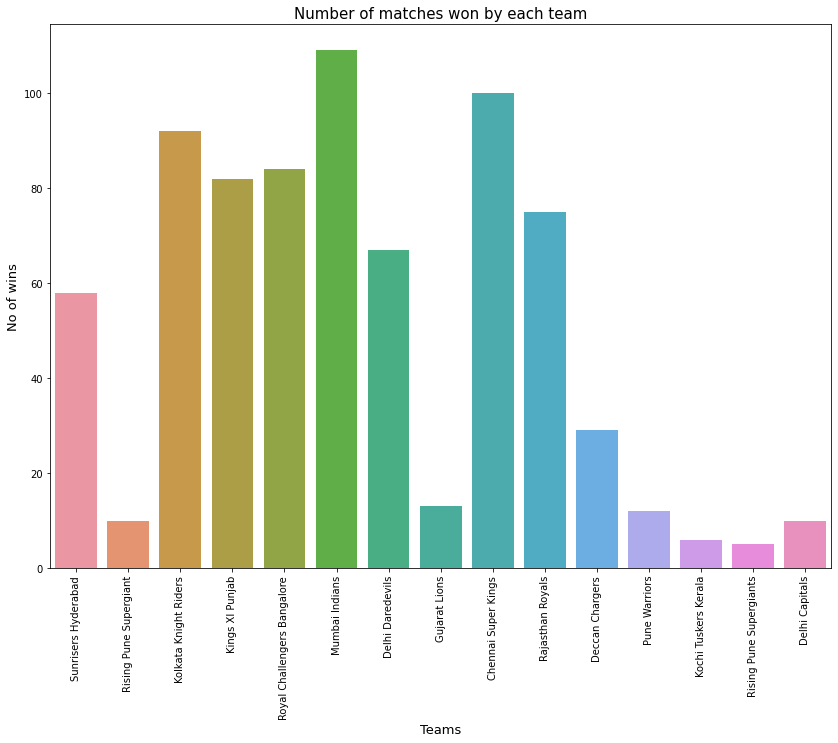

In [8]:
plt.figure(figsize = (14,10))
sns.countplot(x='winner', data = df_matches)
plt.title("Number of matches won by each team", fontsize=15)
plt.xticks(rotation = 90)
plt.xlabel("Teams",fontsize = 13)
plt.ylabel("No of wins", fontsize = 13)
plt.show()

TO see Season Winners respective to  Year

In [9]:

final_matches = df_matches.drop_duplicates(subset = ['season'], keep='last')
final_matches[['season','winner']].reset_index(drop = True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


**List out Best Players of the Tournament**

In [10]:
# to see top players
top_players = df_matches.player_of_match.value_counts()[:10]
top_players.keys

<bound method Series.keys of CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64>

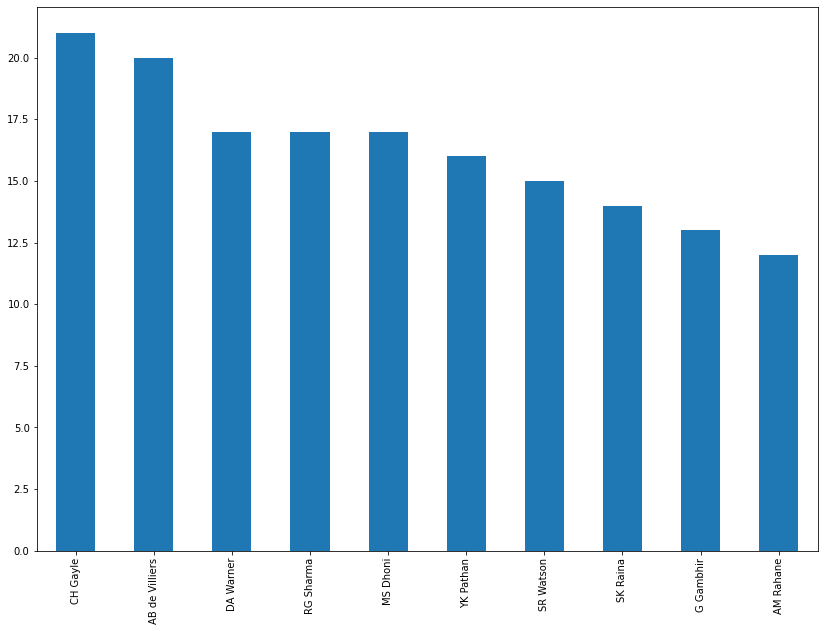

In [11]:
plt.figure(figsize = (14,10))
top_players.plot(kind = 'bar')
plt.show()

## To see Season wise win by wickets 


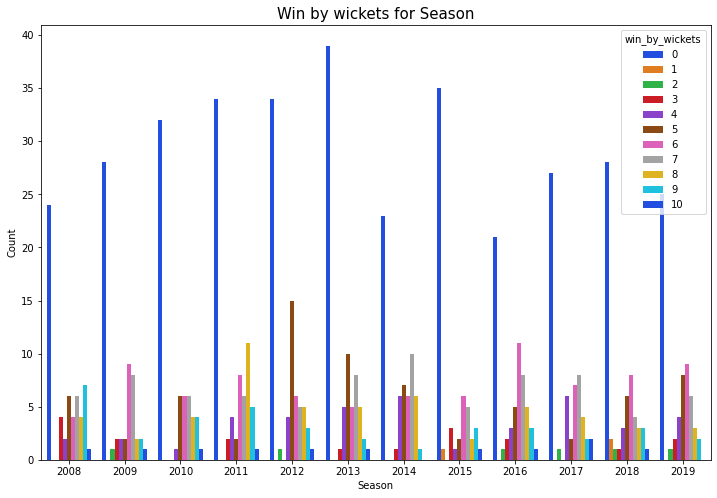

In [12]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'season', hue = 'win_by_wickets', data = df_matches,palette = 'bright')
plt.title("Win by wickets for Season", fontsize = 15)
plt.xlabel("Season", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

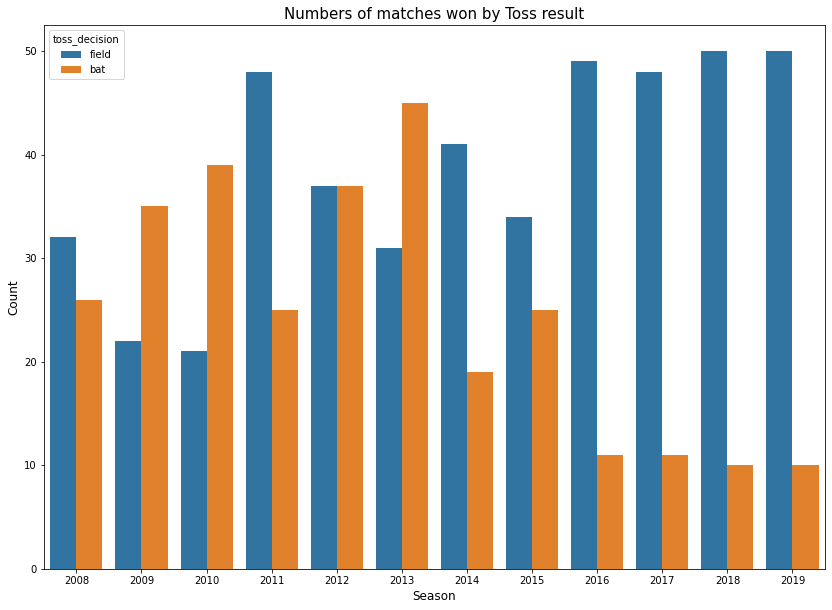

In [13]:
# to see number of mathes won by toss result
plt.figure(figsize = (14,10))
sns.countplot(x = 'season', hue = 'toss_decision', data = df_matches)
plt.title("Numbers of matches won by Toss result", fontsize=15)
plt.xlabel("Season", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()


Most Times winner list

In [14]:
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

To see each season winner and player_of_match

In [15]:

final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [16]:
stats = df_matches[['id','season','winner']]

In [17]:
# merge taken columns to delivery dataframe and create a new one 'df_new'
df_new = df_delivery.merge(stats, left_on = 'match_id', right_on = 'id')

In [18]:
# To see fours and sixes by each teams
df_four=df_new[df_new['batsman_runs']==4]
fours = df_four.groupby('batting_team')['batsman_runs'].agg([('fours','count')]).reset_index()
df_six=df_new[df_new['batsman_runs']==6]
sixes = df_six.groupby('batting_team')['batsman_runs'].agg([('six','count')])
fours_and_sixes = fours.merge(sixes, left_on='batting_team', right_on='batting_team')
fours_and_sixes

,batting_team,fours,six
0,Chennai Super Kings,2193,973
1,Deccan Chargers,957,400
2,Delhi Capitals,242,87
3,Delhi Daredevils,2158,801
4,Gujarat Lions,460,155
5,Kings XI Punjab,2458,976
6,Kochi Tuskers Kerala,170,53
7,Kolkata Knight Riders,2434,930
8,Mumbai Indians,2588,1096
9,Pune Warriors,525,196


***One Of the Most useful tools nowadays used for EDA is Pandas Profiling***


Here we try the same

In [19]:
pip install -U pandas-profiling

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: jinja2>=2.11.1 in e:\softwares\miniconda\envs\eda\lib\site-packages (from pandas-profiling) (2.11.3)



In [20]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_matches)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
prof.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]